# Facebook's Prophet Library

## Importing the data

👇 Go on [trends.google.com](https://trends.google.com/trends/?geo=US) and retrieve the dataset representing the interest over time of the keyword `data science` since 2004 in the US. Once you get the dataset, import the data and display the first few rows

In [34]:
import pandas as pd
import numpy as np

df = pd.read_csv('data_science_google_trends.csv')
print(df)

       Month  data science: (United States)
0    2004-01                             17
1    2004-02                             13
2    2004-03                             11
3    2004-04                              6
4    2004-05                              6
..       ...                            ...
195  2020-04                             82
196  2020-05                             80
197  2020-06                             78
198  2020-07                             77
199  2020-08                             62

[200 rows x 2 columns]


## Display the data

👇Visualize the data by displaying the first few rows of the dataframe

In [35]:
df.head(10)


,Month,data science: (United States)
0,2004-01,17
1,2004-02,13
2,2004-03,11
3,2004-04,6
4,2004-05,6
5,2004-06,10
6,2004-07,11
7,2004-08,7
8,2004-09,12
9,2004-10,10


## Data Preprocessing

Facebook'Prophet library requires the data to be in a specific format. 

👇 Format the dataset as per Facebook Prophet's requirements.
Remember the dataframe should have a `ds` and `y` columns

In [36]:

# Rename the columns to 'ds' and 'y'
df.columns = ['ds', 'y']


print(df.head(10))

        ds   y
0  2004-01  17
1  2004-02  13
2  2004-03  11
3  2004-04   6
4  2004-05   6
5  2004-06  10
6  2004-07  11
7  2004-08   7
8  2004-09  12
9  2004-10  10


## Plotting the data

👇 Plot the data

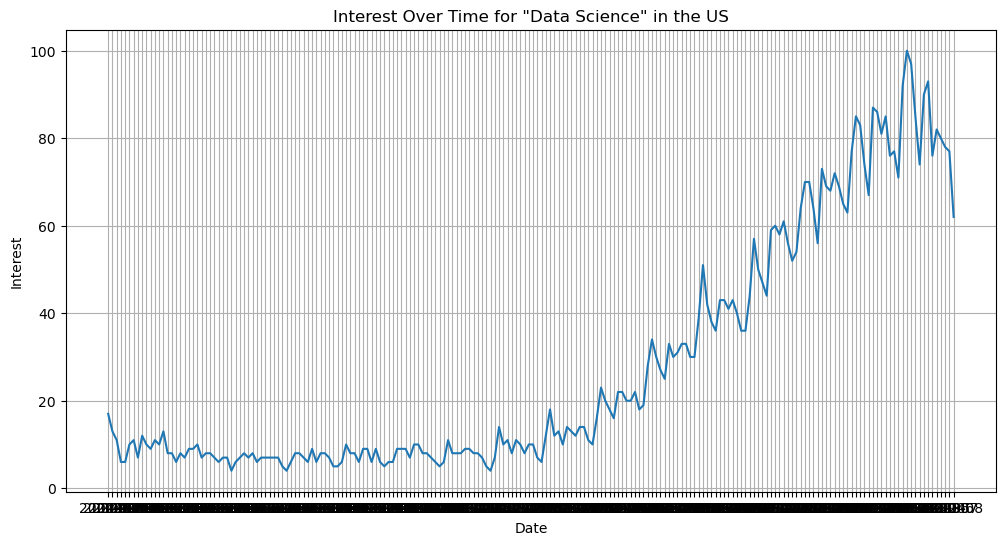

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'])
plt.title('Interest Over Time for "Data Science" in the US')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.grid(True)
plt.show()


## Fitting the data

👇 Fit the data using Facebook's Prophet library. Make sure to use a train/test split

In [51]:
!python -m pip install prophet



     ---------------------------------------- 13.3/13.3 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 93.0/93.0 kB 1.3 MB/s eta 0:00:00
  Using cached holidays-0.34-py3-none-any.whl (778 kB)


In [52]:
import pandas as pd
from prophet import Prophet


train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

# Initialize and fit the Prophet model on the training data
model = Prophet()
model.fit(train_df)



14:16:21 - cmdstanpy - INFO - Chain [1] start processing
14:16:21 - cmdstanpy - INFO - Chain [1] done processing


## Make future predictions

👇Before predicting future values with Facebook's Prophet library, you first need to create a placeholder dataframe that will eventually hold the predictions. Once you create the dataframe, try to predict 2 years in the future.

You can create the predictions' dataframe using `make_future_dataframe()`

In [53]:

model = Prophet()
model.fit(df)


future = model.make_future_dataframe(periods=365 * 2)  # 365 days per year, 2 years

# Make predictions on the future dates
forecast = model.predict(future)

# Display the last few rows of the forecasted data for the future
print(forecast.tail())


14:17:58 - cmdstanpy - INFO - Chain [1] start processing
14:17:58 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
925 2022-07-28  113.747003  139.711203  150.207093   112.308484   115.194816   
926 2022-07-29  113.777005  131.413349  142.497657   112.336241   115.226813   
927 2022-07-30  113.807007  123.873003  134.721008   112.363998   115.258811   
928 2022-07-31  113.837010  115.978230  126.517834   112.391755   115.290809   
929 2022-08-01  113.867012  108.391945  119.068442   112.419511   115.323686   

     additive_terms  additive_terms_lower  additive_terms_upper     yearly  \
925       31.226759             31.226759             31.226759  31.226759   
926       23.295739             23.295739             23.295739  23.295739   
927       15.374854             15.374854             15.374854  15.374854   
928        7.606511              7.606511              7.606511   7.606511   
929        0.126727              0.126727              0.126727   0.126727   

     yearly_lower  yearly_upper  multiplicative_te

## Plotting the forecast

👇 It's time to visualize our forecast. Make use of the handy [`model.plot(forecast)`](https://facebook.github.io/prophet/docs/quick_start.html)

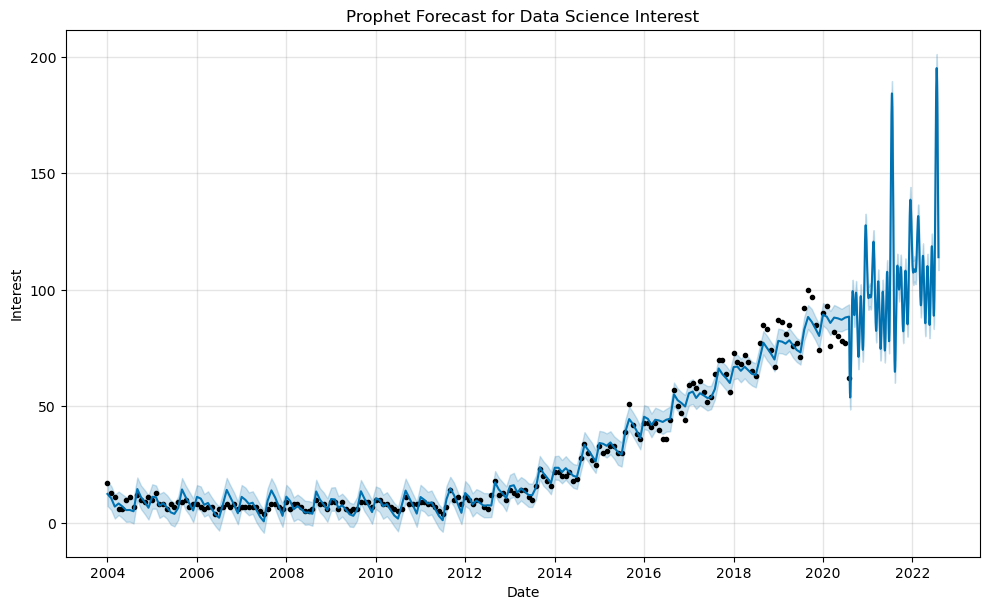

In [54]:
fig = model.plot(forecast)
plt.title('Prophet Forecast for Data Science Interest')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.show()

👉 From 2004 to 2018 we can see the train data and the forecasted data from 2018 to 2020.

We can also notice a shaded region behind the plot which represents the 95% uncertainty interval.

The black dots represent the original data

## Time Series' trend and seasonality

👇 Plot the trend and yearly seasonality of the time series. This can be done using the `plot_components()` function from Facebook's Prophet Library

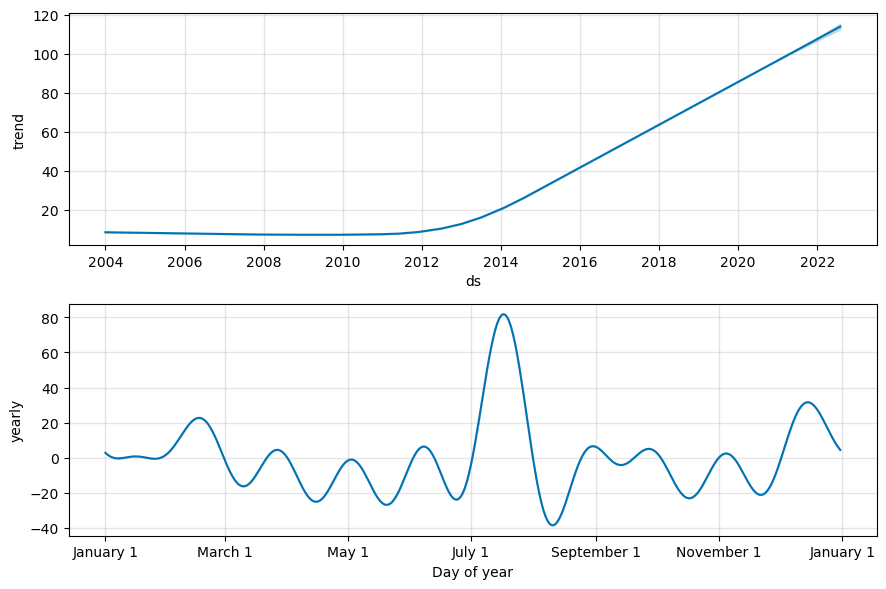

In [55]:
fig = model.plot_components(forecast)
plt.show()

## Evaluating the model with cross-validation!

👇 Using `cross_validation` and `performance_metrics` from [fbprophet.diagnostics](https://facebook.github.io/prophet/docs/diagnostics.html), evaluate the performance of your model
<img src='https://facebook.github.io/prophet/static/diagnostics_files/diagnostics_3_0.png'>

More precisely, create a Time Series K-fold CV with
- train sets of size 5 years
- horizon val sizes of 1 years
- shifting each fold by 180 days

In [70]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics


df_cv = cross_validation(model, initial = '1825 days', period = '180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
print(df_p)

  0%|          | 0/22 [00:00<?, ?it/s]

14:41:40 - cmdstanpy - INFO - Chain [1] start processing
14:41:42 - cmdstanpy - INFO - Chain [1] done processing
14:41:43 - cmdstanpy - INFO - Chain [1] start processing
14:41:44 - cmdstanpy - INFO - Chain [1] done processing
14:41:44 - cmdstanpy - INFO - Chain [1] start processing
14:41:45 - cmdstanpy - INFO - Chain [1] done processing
14:41:45 - cmdstanpy - INFO - Chain [1] start processing
14:41:46 - cmdstanpy - INFO - Chain [1] done processing
14:41:47 - cmdstanpy - INFO - Chain [1] start processing
14:41:47 - cmdstanpy - INFO - Chain [1] done processing
14:41:48 - cmdstanpy - INFO - Chain [1] start processing
14:41:49 - cmdstanpy - INFO - Chain [1] done processing
14:41:50 - cmdstanpy - INFO - Chain [1] start processing
14:41:51 - cmdstanpy - INFO - Chain [1] done processing
14:41:52 - cmdstanpy - INFO - Chain [1] start processing
14:41:52 - cmdstanpy - INFO - Chain [1] done processing
14:41:53 - cmdstanpy - INFO - Chain [1] start processing
14:41:53 - cmdstanpy - INFO - Chain [1]

     horizon         mse       rmse       mae      mape     mdape     smape  \
0    39 days   23.648900   4.863013  3.746757  0.142903  0.129037  0.158786   
1    40 days   23.137611   4.810157  3.612556  0.134057  0.125754  0.148090   
2    42 days   22.687452   4.763135  3.521335  0.125509  0.125290  0.137700   
3    44 days   22.637257   4.757863  3.487830  0.121954  0.117781  0.133759   
4    45 days   16.182383   4.022733  3.085642  0.116037  0.115337  0.126074   
..       ...         ...        ...       ...       ...       ...       ...   
185 359 days   61.461153   7.839716  6.814111  0.215308  0.175377  0.252706   
186 360 days   63.284809   7.955175  6.969559  0.227583  0.206575  0.269438   
187 363 days   62.132939   7.882445  6.806455  0.223132  0.206575  0.264656   
188 364 days   68.741211   8.291032  7.105575  0.229759  0.231051  0.273888   
189 365 days  117.303468  10.830673  8.324522  0.245308  0.260163  0.282877   

     coverage  
0    0.346154  
1    0.384615  
2  

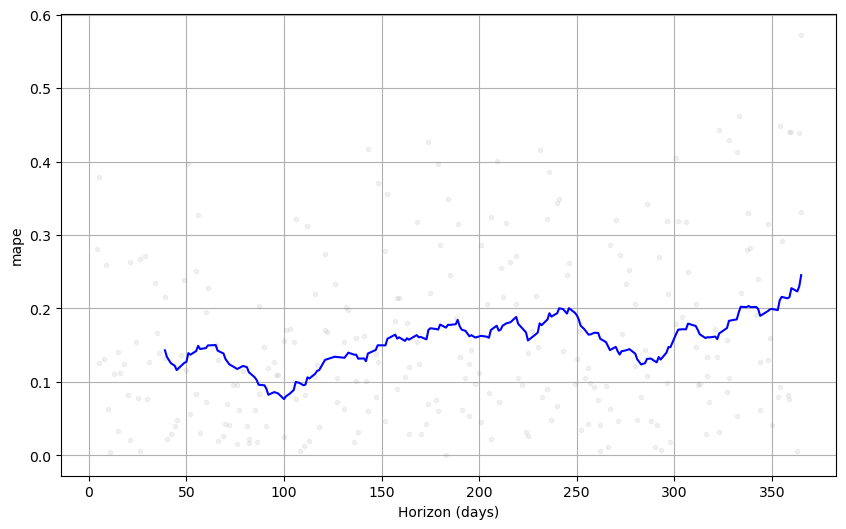

In [71]:
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='mape')  



⚠️ Don't forget to push the challenge to GitHub once you're done 😄